In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
import time

pd.set_option('display.precision', 5)
pd.set_option('display.max_rows', None)
sns.set_style('whitegrid')
warnings.simplefilter(action='ignore', category=FutureWarning)

### Data Understanding

In [3]:
train_df = pd.read_csv("E:\\Bagas's File\\Data Science Bagas\\Datasets\\Data Train.csv")
test_df = pd.read_csv("E:\\Bagas's File\\Data Science Bagas\\Datasets\\Data Test.csv")

In [4]:
display(train_df.head())
display(test_df.head())

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [5]:
display(train_df.info())
display(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

None

In [6]:
display(train_df.describe().T)
display(test_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.23624,39.69840,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.63176,13.43988,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.25960,54.01237,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.90729,19.85082,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.64468,9.18210,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.17391,50.24952,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.17647,19.90859,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.01501,4.27121,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.52788,50.35355,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.83953,20.09322,0.0,86.0000,100.00,113.0000,175.00


,count,mean,std,min,25%,50%,75%,max
id,750.0,375.50000,216.65064,1.00,188.2500,375.500,562.7500,750.00
account_length,750.0,100.38533,39.69903,1.00,74.0000,101.000,126.0000,238.00
number_vmail_messages,750.0,8.45467,14.12371,0.00,0.0000,0.000,21.0000,51.00
total_day_minutes,750.0,180.45493,53.25834,12.50,146.6250,178.200,215.9750,350.80
total_day_calls,750.0,100.72133,19.71854,39.00,88.0000,101.000,114.0000,163.00
total_day_charge,750.0,30.67792,9.05376,2.13,24.9250,30.295,36.7150,59.64
total_eve_minutes,750.0,203.25827,52.18547,31.20,166.8000,203.350,235.9750,363.70
total_eve_calls,750.0,100.27333,19.36754,37.00,87.0000,101.000,113.0000,164.00
total_eve_charge,750.0,17.27708,4.43564,2.65,14.1775,17.285,20.0575,30.91
total_night_minutes,750.0,199.61947,51.53135,50.90,164.4750,199.450,234.8000,364.30


In [7]:
display(train_df.describe(include='object').T)
display(test_df.describe(include='object').T)

,count,unique,top,freq
state,4250,51,WV,139
area_code,4250,3,area_code_415,2108
international_plan,4250,2,no,3854
voice_mail_plan,4250,2,no,3138
churn,4250,2,no,3652


,count,unique,top,freq
state,750,51,AL,23
area_code,750,3,area_code_415,387
international_plan,750,2,no,673
voice_mail_plan,750,2,no,539


In [8]:
train_df['churn'] = train_df['churn'].map({'yes': 1, 'no': 0})

In [9]:
display(train_df.shape, train_df.columns)
display(test_df.shape, train_df.columns)

(4250, 20)

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

(750, 20)

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

### Exploratory Data Analysis

In [10]:
numerical = ['account_length','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge','total_eve_minutes','total_eve_calls'
            ,'total_eve_charge','total_night_minutes','total_night_calls','total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge',
            'number_customer_service_calls']

categorical = ['state','area_code','international_plan','voice_mail_plan']

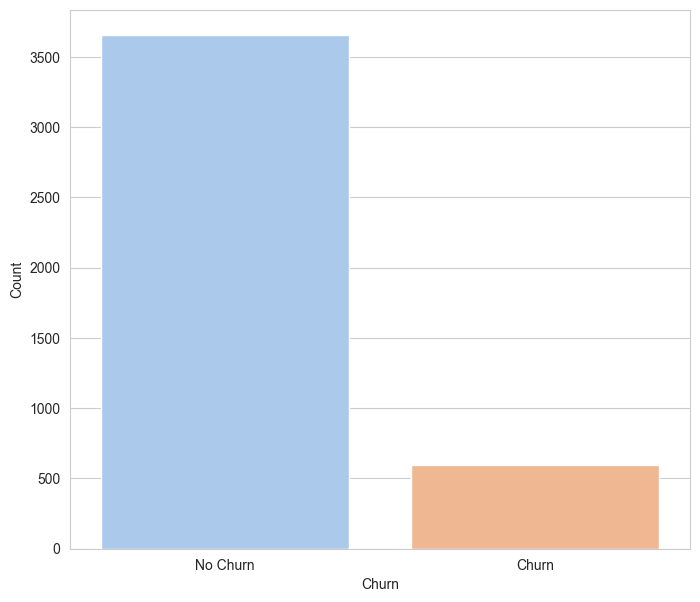

count    4250.00000
mean        0.14071
std         0.34776
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         1.00000
Name: churn, dtype: float64

In [11]:
plt.figure(figsize=(8,7))
ax = sns.countplot(x=train_df['churn'], data=train_df, palette='pastel')
ax.set_xticks([1,0])
ax.set_xticklabels(['Churn', 'No Churn'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

train_df['churn'].describe().T

#### Plot Distribution of Numerical Features

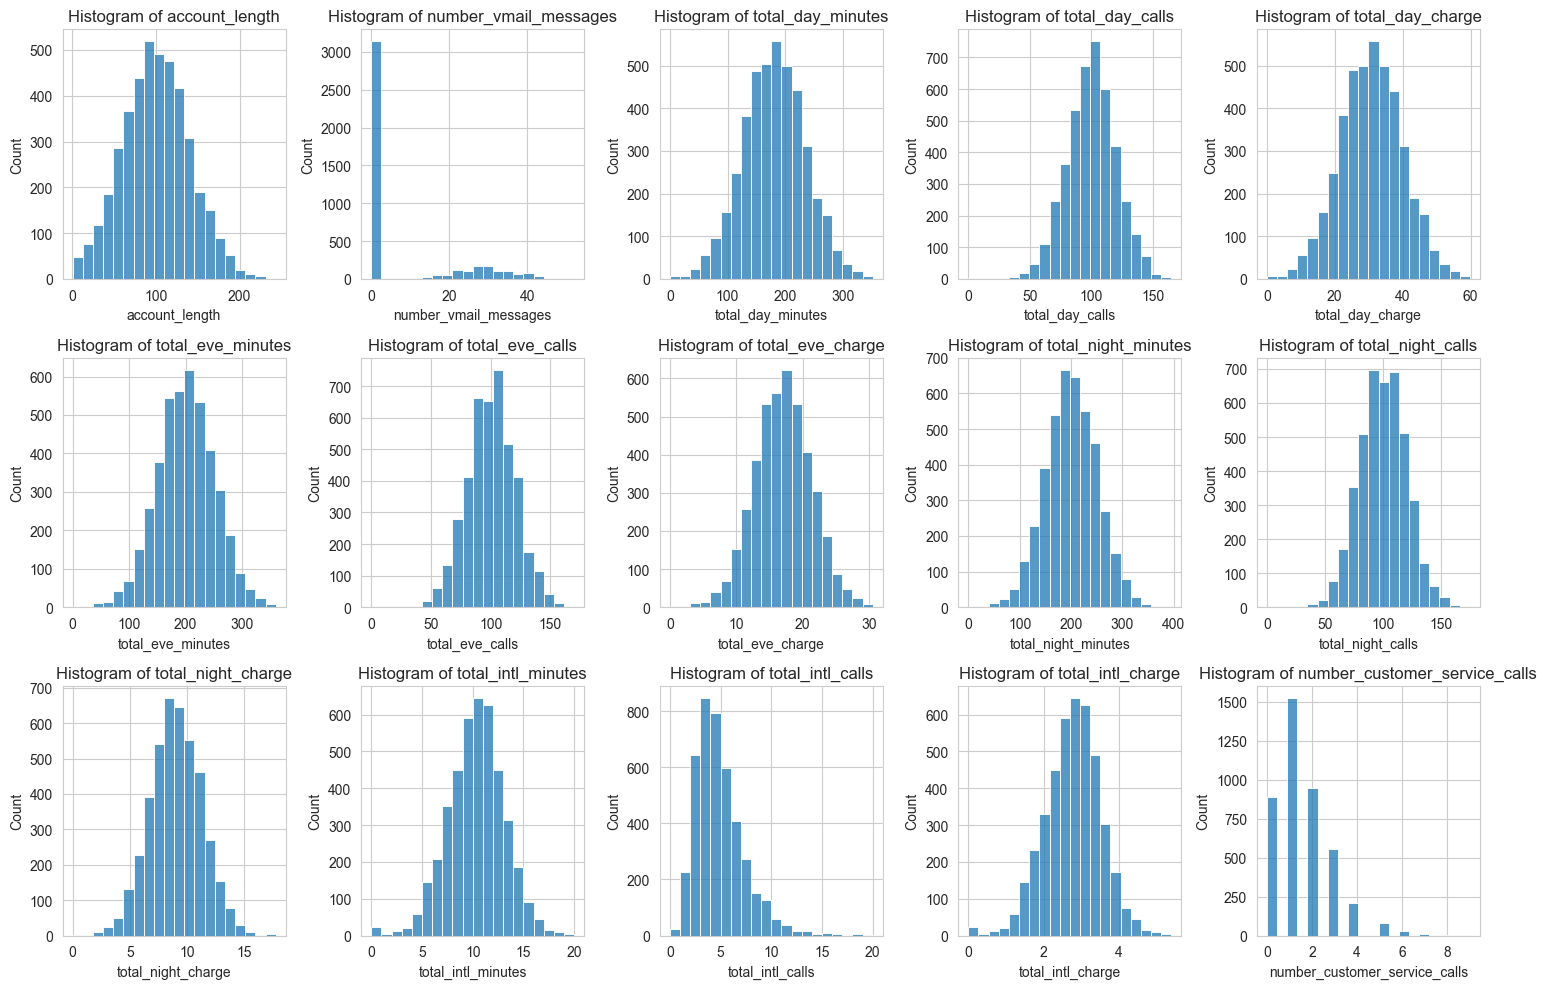

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.23624,39.69840,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.63176,13.43988,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.25960,54.01237,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.90729,19.85082,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.64468,9.18210,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.17391,50.24952,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.17647,19.90859,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.01501,4.27121,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.52788,50.35355,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.83953,20.09322,0.0,86.0000,100.00,113.0000,175.00


In [12]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
axes = axes.flatten()
for i, column in enumerate(numerical):
    sns.histplot(data=train_df[column],ax=axes[i], bins=20)
    axes[i].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

train_df[numerical].describe().T

#### Plot Correlation of Numerical Features

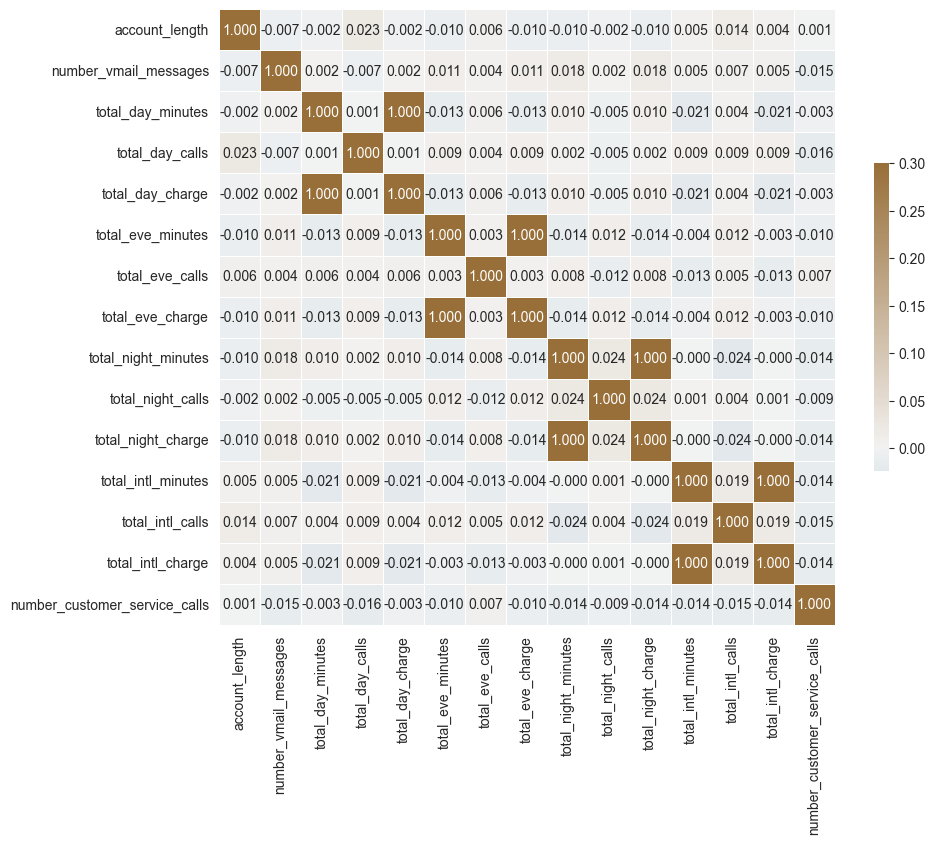

In [13]:
plt.figure(figsize=(10, 8))
correlation = train_df[numerical].corr()
c_maps = sns.diverging_palette(230, 50, as_cmap=True)
correlation_map = sns.heatmap(correlation, cmap=c_maps, vmax=0.3, center=0, square=True, linewidth=0.5,cbar_kws={"shrink":0.5}, annot=True, fmt='0.3f')

#### Plot Numerical Variable vs. Churn

In [14]:
train_df['churn'] = train_df['churn'].astype('category')
def numerical_variable(df, column, churn_col='churn'):
    fig, axes = plt.subplots(2,1,figsize=(7,5), sharex=True)
    sns.histplot(data=df, x=df[column], hue=churn_col, kde=False, multiple='stack', palette={1:'blue', 0:'green'}, ax=axes[0], alpha=1)
    axes[0].legend(labels=['Churn','No Churn'])
    sns.boxplot(x=column, y=churn_col, data=df,palette={'1': 'blue', '0': 'green'},ax=axes[1])
    axes[1].set_yticks([0, 1])
    axes[1].set_yticklabels(['No Churn','Churn'])
    plt.tight_layout()
    plt.show()
    return df.groupby(churn_col)[column].describe()

#### account_length

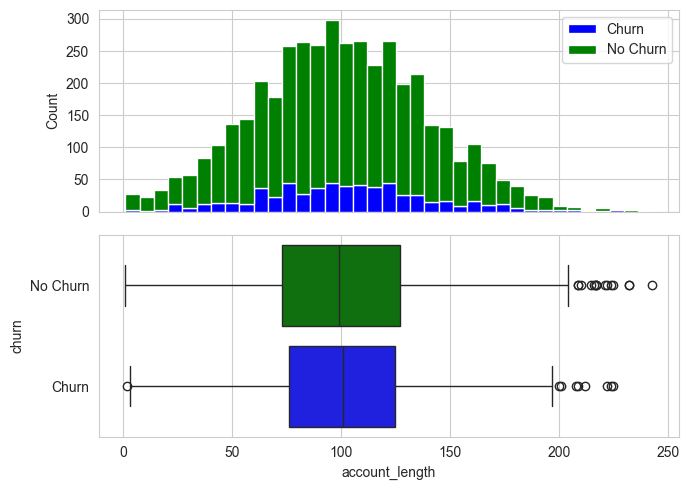

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,3652.0,99.92497,39.74874,1.0,73.0,99.0,127.0,243.0
1,598.0,102.13712,39.36916,2.0,76.0,101.0,125.0,225.0


In [15]:
numerical_variable(train_df, 'account_length')

#### number_vmail_messages

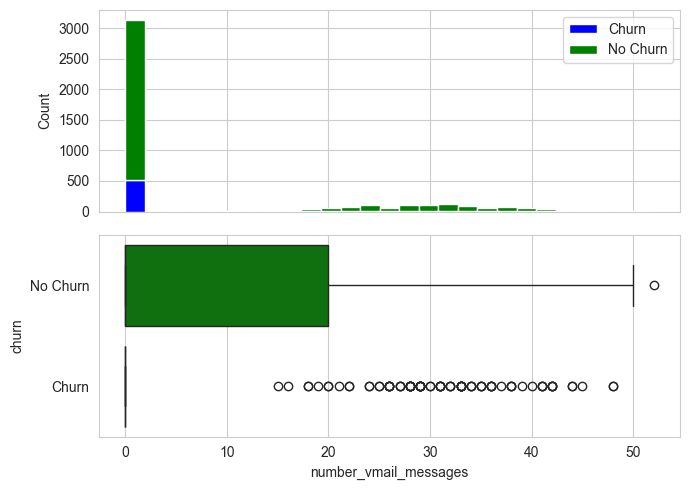

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,3652.0,8.17744,13.70630,0.0,0.0,0.0,20.0,52.0
1,598.0,4.29933,11.12465,0.0,0.0,0.0,0.0,48.0


In [16]:
numerical_variable(train_df, 'number_vmail_messages')

#### total_day_minutes

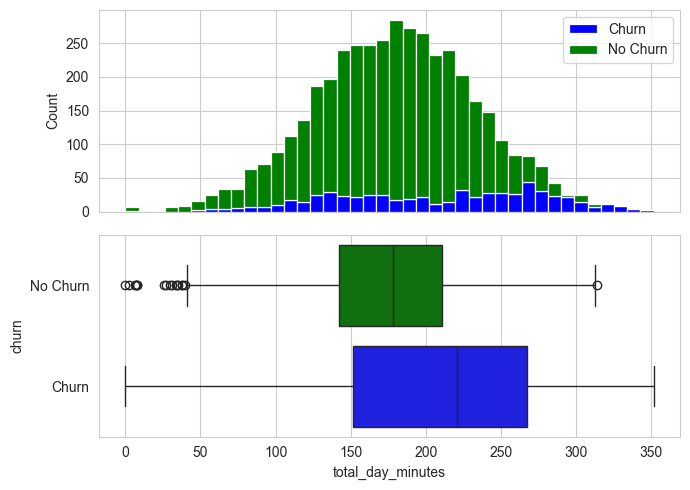

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,3652.0,175.55509,49.54978,0.0,142.500,178.25,210.700,313.8
1,598.0,208.99013,69.18349,0.0,151.175,220.55,266.975,351.5


In [17]:
numerical_variable(train_df, 'total_day_minutes')

#### total_day_calls

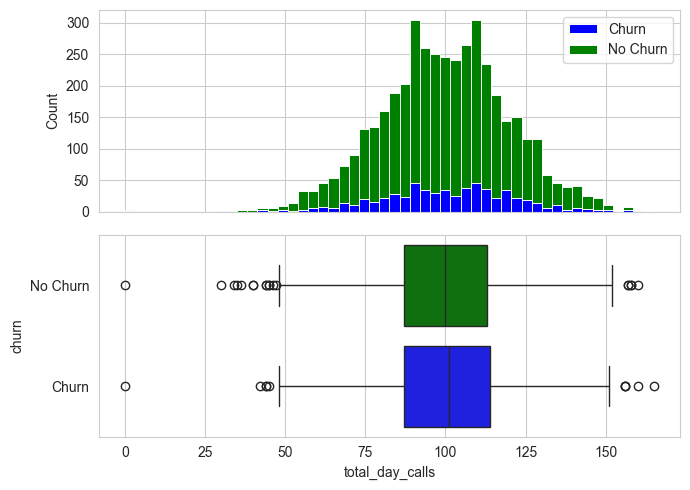

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,3652.0,99.81380,19.65962,0.0,87.0,100.0,113.0,160.0
1,598.0,100.47826,20.98892,0.0,87.0,101.0,114.0,165.0


In [18]:
numerical_variable(train_df, 'total_day_calls')

#### total_day_charge

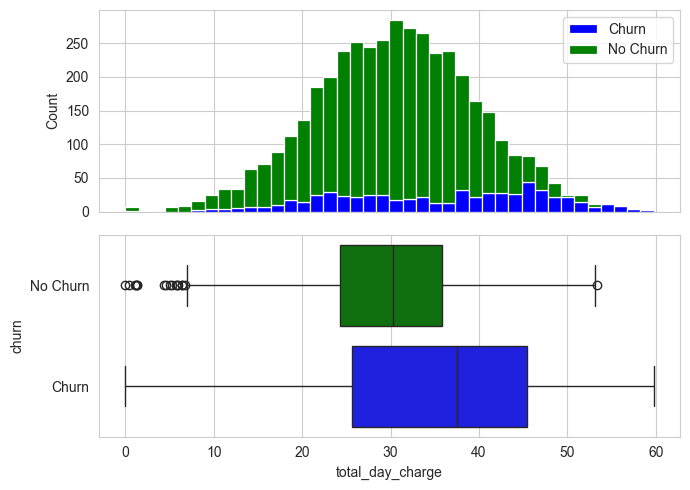

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,3652.0,29.84495,8.42342,0.0,24.2300,30.300,35.820,53.35
1,598.0,35.52868,11.76142,0.0,25.6975,37.495,45.385,59.76


In [19]:
numerical_variable(train_df, 'total_day_charge')

#### total_eve_minutes

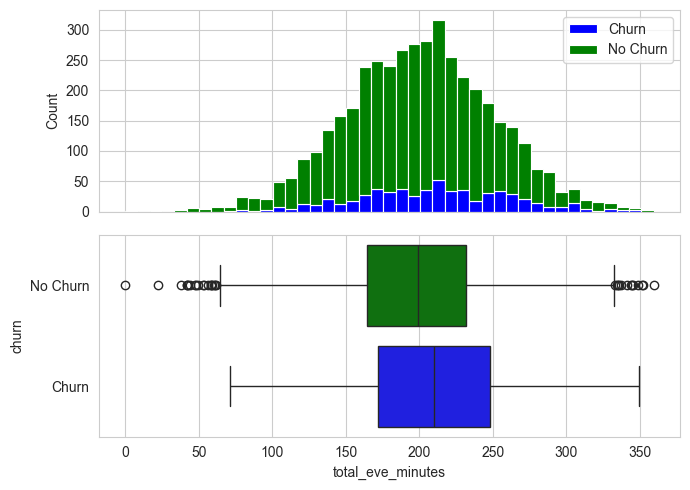

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,3652.0,198.57067,49.89773,0.0,164.575,199.2,231.725,359.3
1,598.0,209.96488,51.31232,70.9,172.150,210.2,248.100,349.4


In [20]:
numerical_variable(train_df, 'total_eve_minutes')

#### total_eve_calls

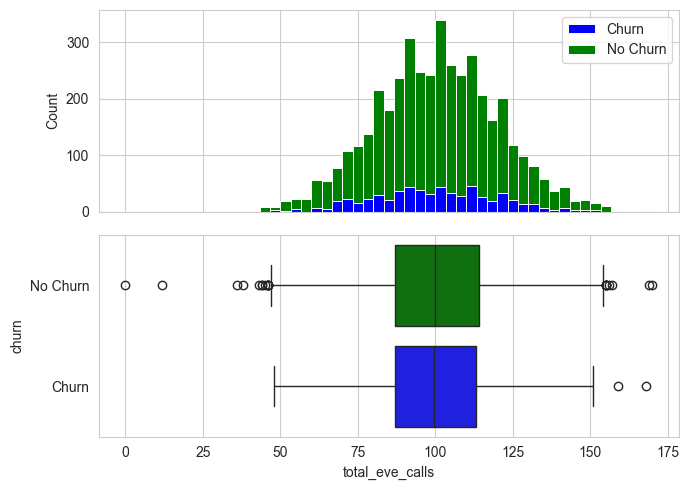

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,3652.0,100.23138,19.93612,0.0,87.0,100.0,114.0,170.0
1,598.0,99.84114,19.75291,48.0,87.0,99.5,113.0,168.0


In [21]:
numerical_variable(train_df, 'total_eve_calls')

#### total_eve_charge

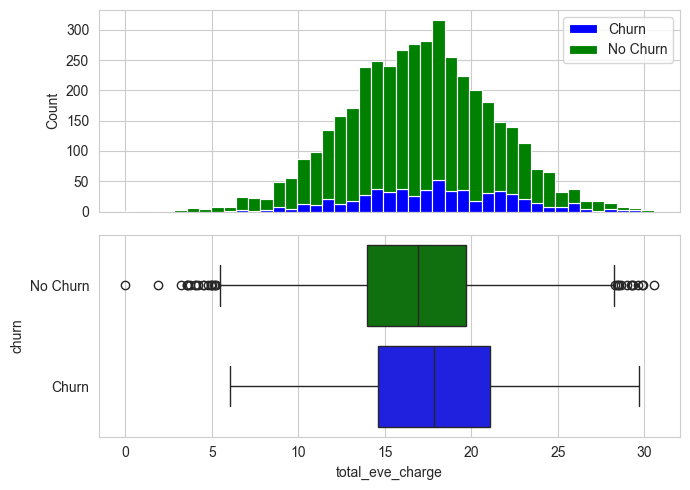

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,3652.0,16.87874,4.24131,0.00,13.9875,16.93,19.6925,30.54
1,598.0,17.84721,4.36154,6.03,14.6350,17.87,21.0900,29.70


In [22]:
numerical_variable(train_df, 'total_eve_charge')

#### total_night_minutes

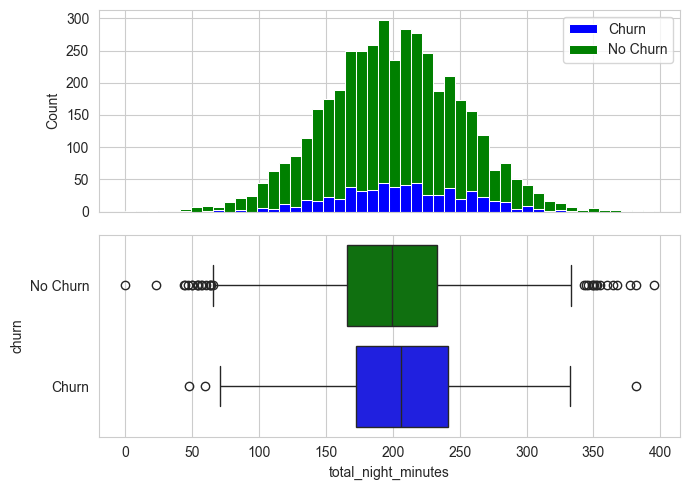

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,3652.0,199.57752,50.52115,0.0,165.975,199.3,233.125,395.0
1,598.0,206.33177,48.95982,47.4,172.825,206.1,241.250,381.6


In [23]:
numerical_variable(train_df, 'total_night_minutes')

#### total_night_calls

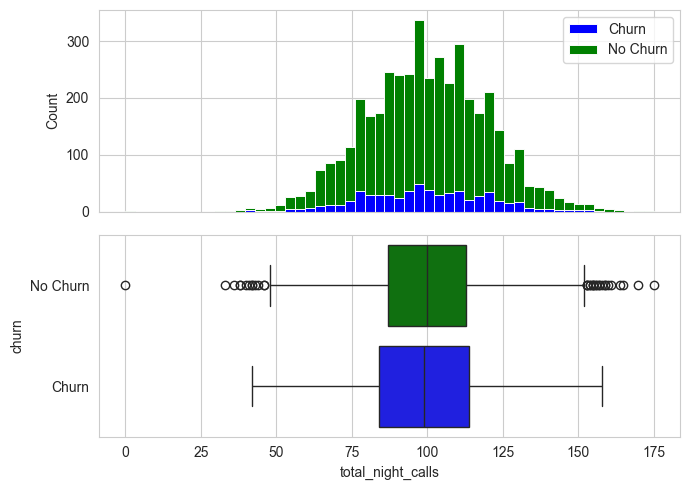

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,3652.0,99.94277,20.06613,0.0,87.0,100.0,113.0,175.0
1,598.0,99.20903,20.26338,42.0,84.0,99.0,114.0,158.0


In [24]:
numerical_variable(train_df, 'total_night_calls')

#### total_night_charge

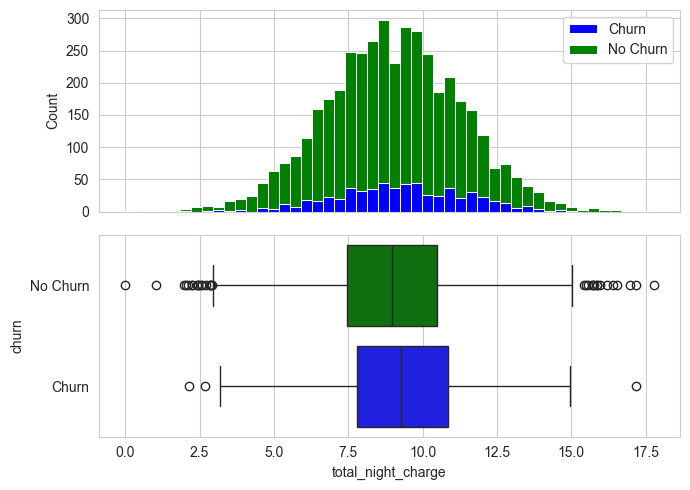

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,3652.0,8.98113,2.27346,0.00,7.47,8.970,10.4900,17.77
1,598.0,9.28503,2.20322,2.13,7.78,9.275,10.8575,17.17


In [25]:
numerical_variable(train_df, 'total_night_charge')

#### total_intl_minutes

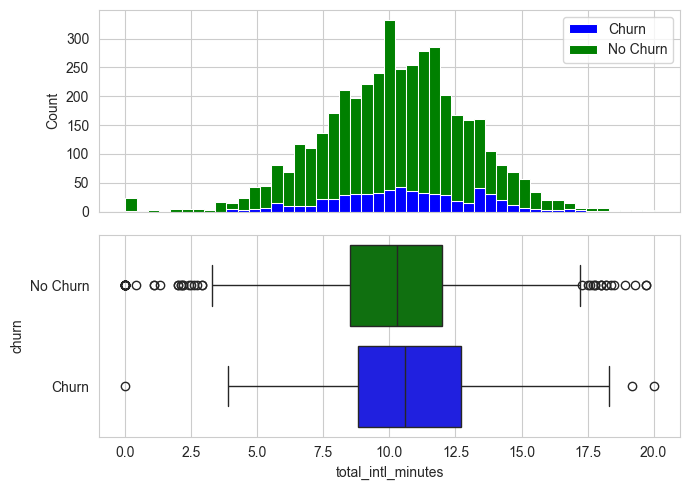

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,3652.0,10.19444,2.74991,0.0,8.5,10.3,12.0,19.7
1,598.0,10.63244,2.79449,0.0,8.8,10.6,12.7,20.0


In [26]:
numerical_variable(train_df, 'total_intl_minutes')

#### total_intl_calls

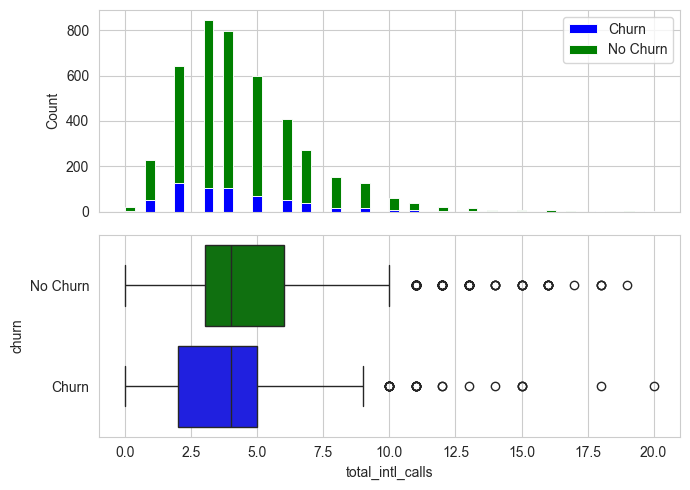

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,3652.0,4.46057,2.43386,0.0,3.0,4.0,6.0,19.0
1,598.0,4.21739,2.62693,0.0,2.0,4.0,5.0,20.0


In [27]:
numerical_variable(train_df, 'total_intl_calls')

#### total_intl_charge

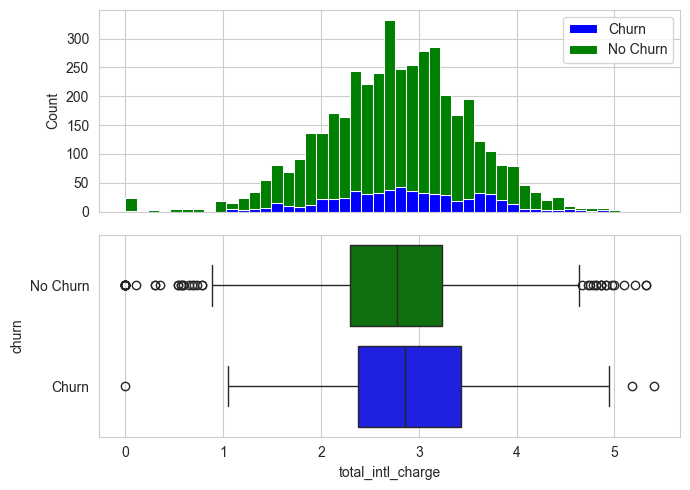

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,3652.0,2.75302,0.74247,0.0,2.30,2.78,3.24,5.32
1,598.0,2.87125,0.75441,0.0,2.38,2.86,3.43,5.40


In [28]:
numerical_variable(train_df, 'total_intl_charge')

#### number_customer_service_calls

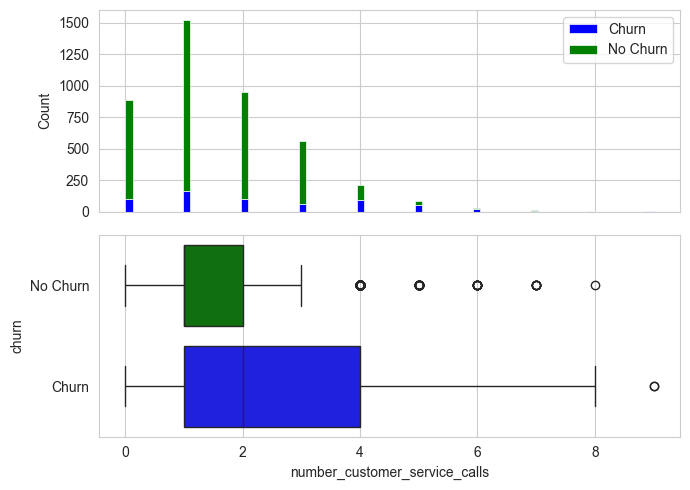

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,3652.0,1.44168,1.16516,0.0,1.0,1.0,2.0,8.0
1,598.0,2.27592,1.82733,0.0,1.0,2.0,4.0,9.0


In [29]:
numerical_variable(train_df, 'number_customer_service_calls')

### Plot Distribution of Categorical Features

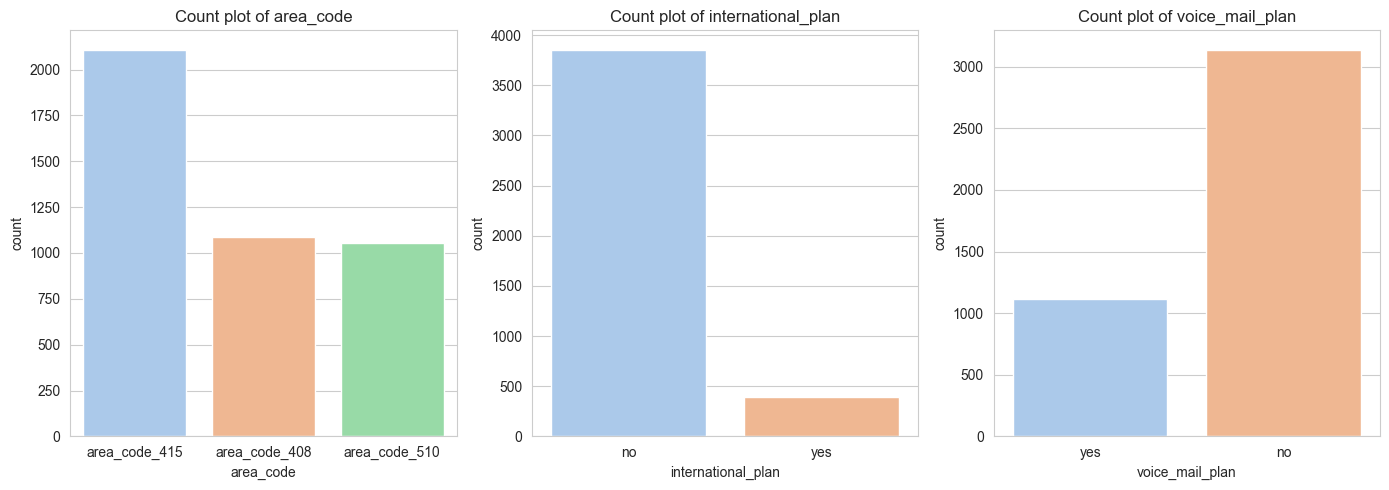

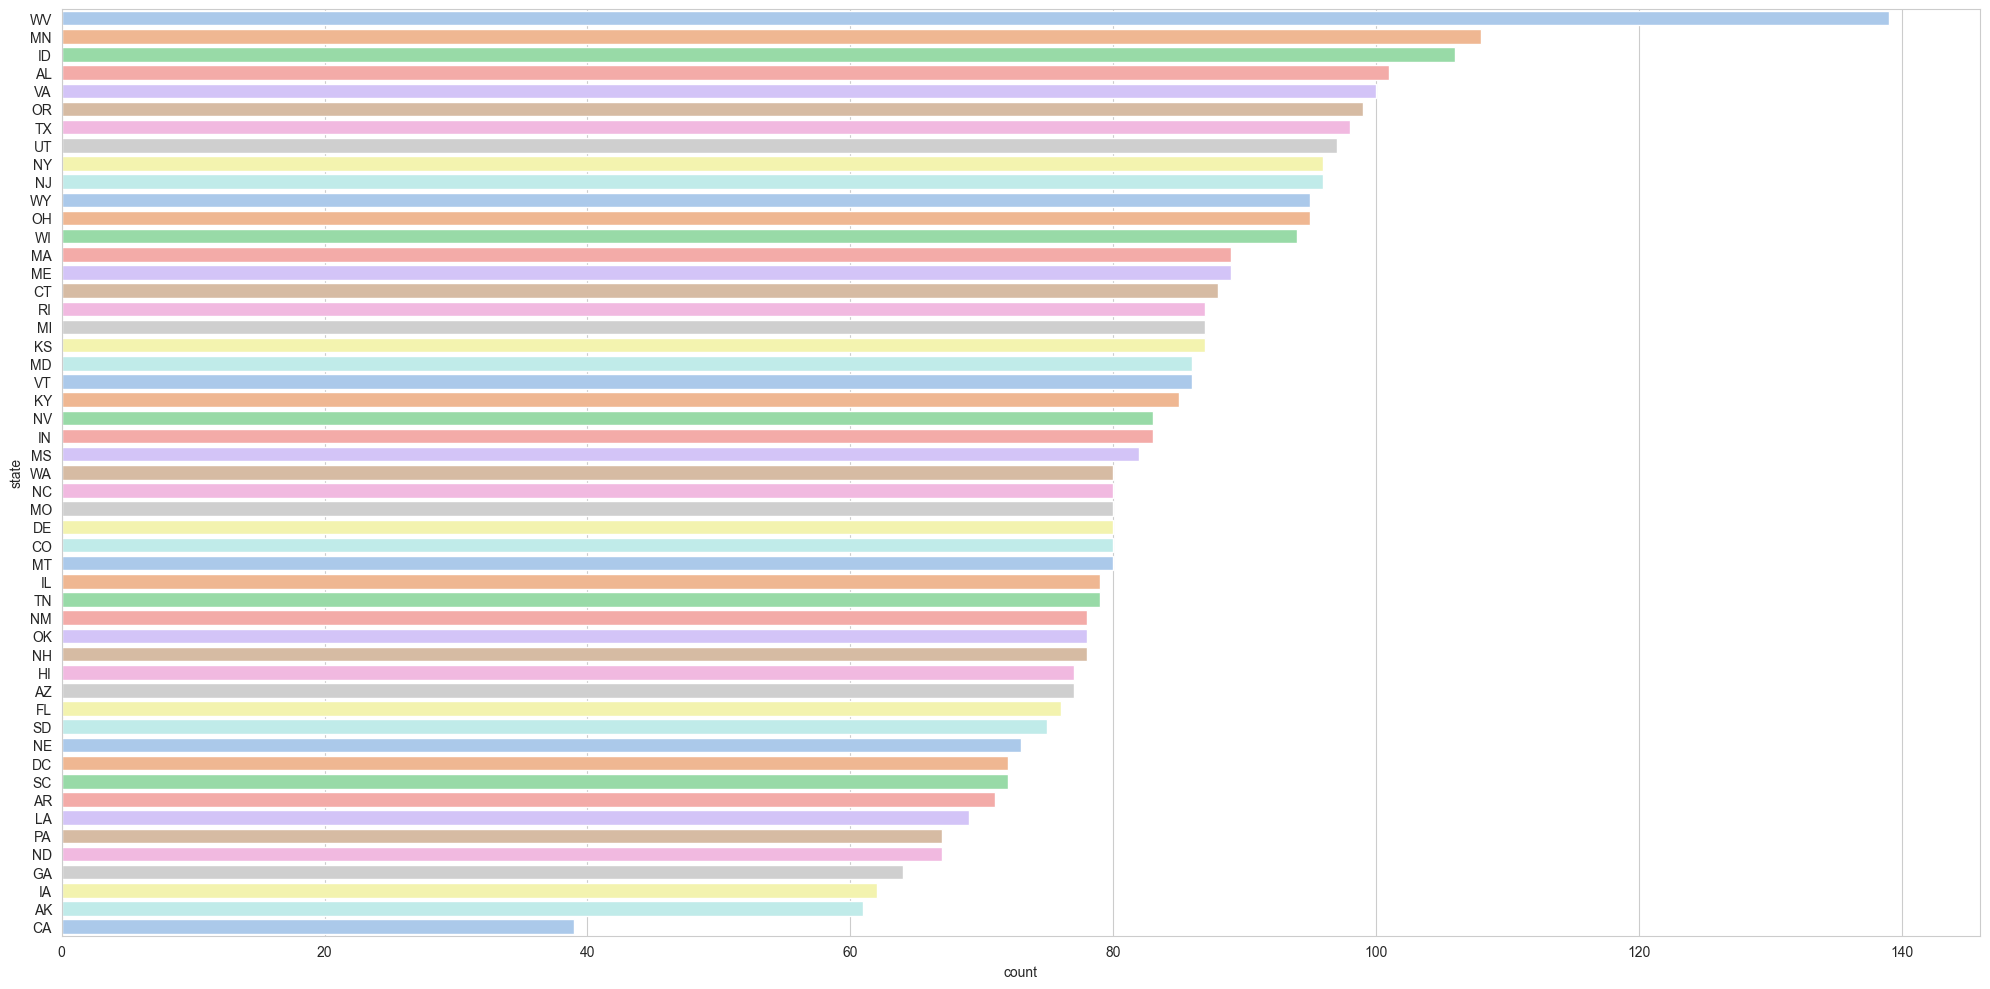

,state,area_code,international_plan,voice_mail_plan
count,4250,4250,4250,4250
unique,51,3,2,2
top,WV,area_code_415,no,no
freq,139,2108,3854,3138


In [30]:
cat_no_state = [column for column in categorical if column != 'state']
fig, axes = plt.subplots(1, 3, figsize=(14,5))
axes = axes.flatten()
for i, column in enumerate(cat_no_state):
    sns.countplot(x=column,data=train_df,ax=axes[i], palette='pastel')
    axes[i].set_title(f'Count plot of {column}')

plt.tight_layout()
plt.show()

order = train_df['state'].value_counts().index
plt.figure(figsize=(20,10))
sns.countplot(y=train_df['state'], data=train_df, palette='pastel', order=order)
plt.tight_layout()
plt.show()

train_df[categorical].describe(include='object')

#### Plot Categorical Variable vs. Churn

In [31]:
train_df['churn'] = train_df['churn'].astype('int')
def categorical_variable(df, column, churn_col='churn'):
    fig, axes = plt.subplots(1,2,figsize=(14,7), sharex=True)
    axes = axes.flatten()
    sns.countplot(x=column, data=df, hue=churn_col, palette='pastel', ax=axes[0])

    churn_rate = df.groupby(column)[churn_col].mean().reset_index()
    sns.barplot(x=column, data=churn_rate, y=churn_col, palette='pastel', ax=axes[1])

    axes[0].set_title(f'{column} vs Churn')
    axes[1].set_title(f'Churn Rate of Area {column}')

    plt.tight_layout
    plt.show()

    return df.groupby(column)[churn_col].value_counts(normalize='True')

#### area_code

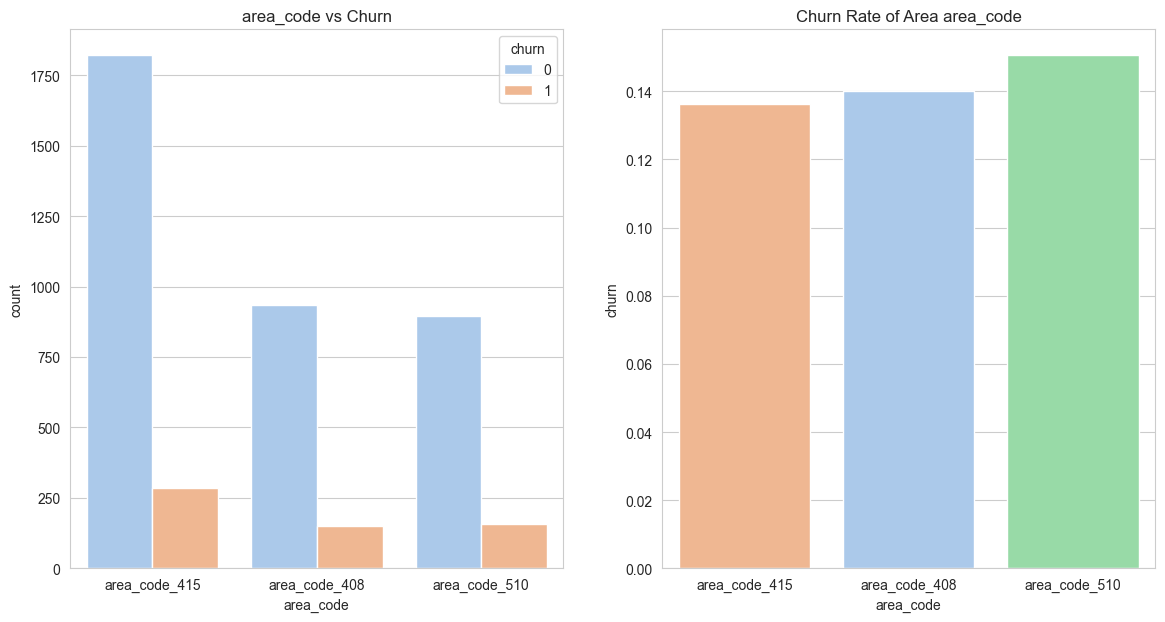

area_code      churn
area_code_408  0        0.86004
               1        0.13996
area_code_415  0        0.86385
               1        0.13615
area_code_510  0        0.84943
               1        0.15057
Name: proportion, dtype: float64

In [32]:
categorical_variable(train_df, 'area_code')

#### state

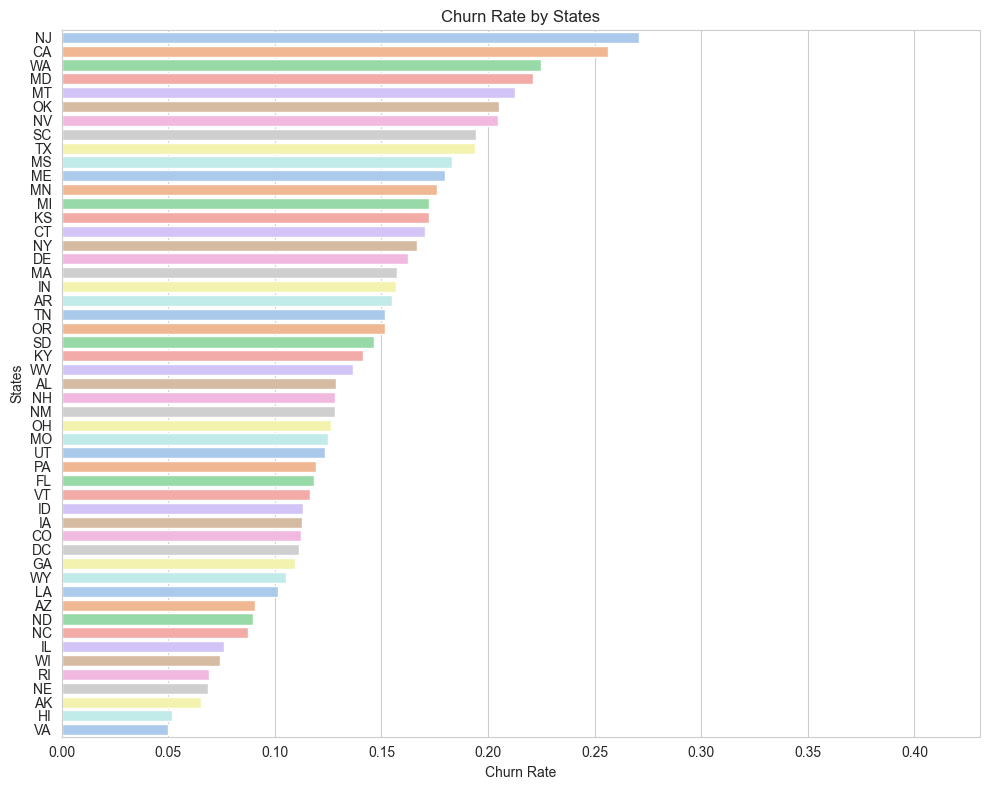

churn,0,1
state,,
NJ,70,26
TX,79,19
MN,89,19
WV,120,19
MD,67,19
WA,62,18
NV,66,17
MT,63,17
ME,73,16


In [33]:
churnrate = train_df.groupby('state')['churn'].mean().reset_index()
ordr = churnrate.sort_values(by='churn', ascending=False)['state']
plt.figure(figsize=(10,8))
sns.barplot(x=train_df['churn'], y=train_df['state'], data=churnrate, palette='pastel', errcolor='none', order=ordr)
plt.title('Churn Rate by States')
plt.xlabel('Churn Rate')
plt.ylabel('States')
plt.tight_layout()
plt.show()


train_df.groupby('state')['churn'].value_counts().unstack(fill_value=0).sort_values(by=1, ascending=False)

#### international_plan

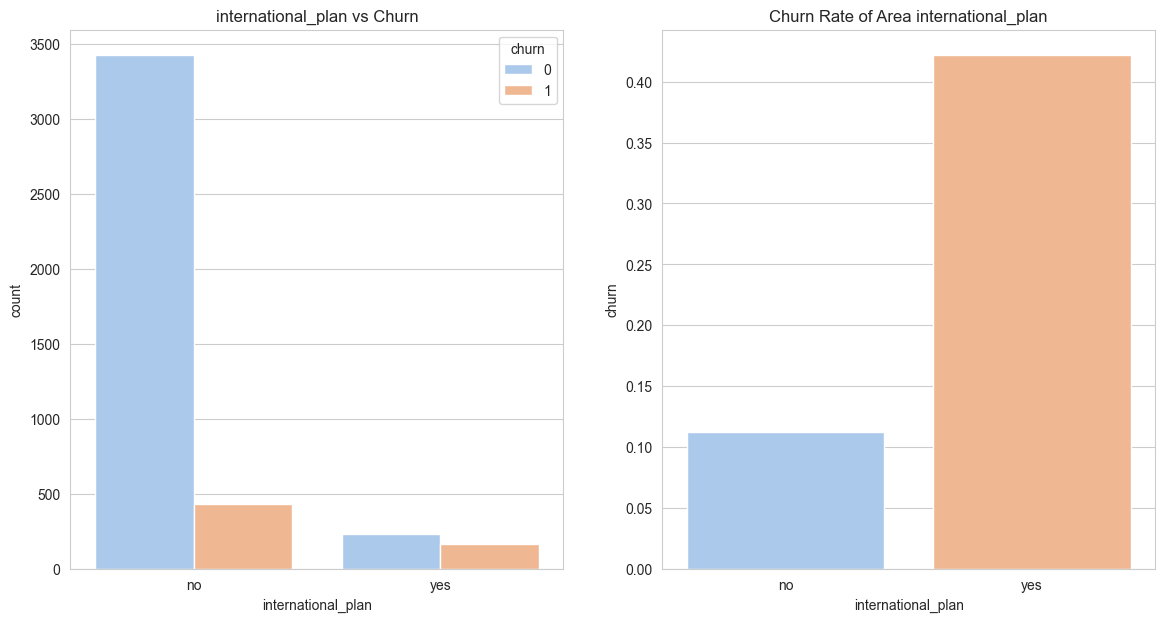

international_plan  churn
no                  0        0.88817
                    1        0.11183
yes                 0        0.57828
                    1        0.42172
Name: proportion, dtype: float64

In [34]:
categorical_variable(train_df, 'international_plan')

#### voice_mail_plan

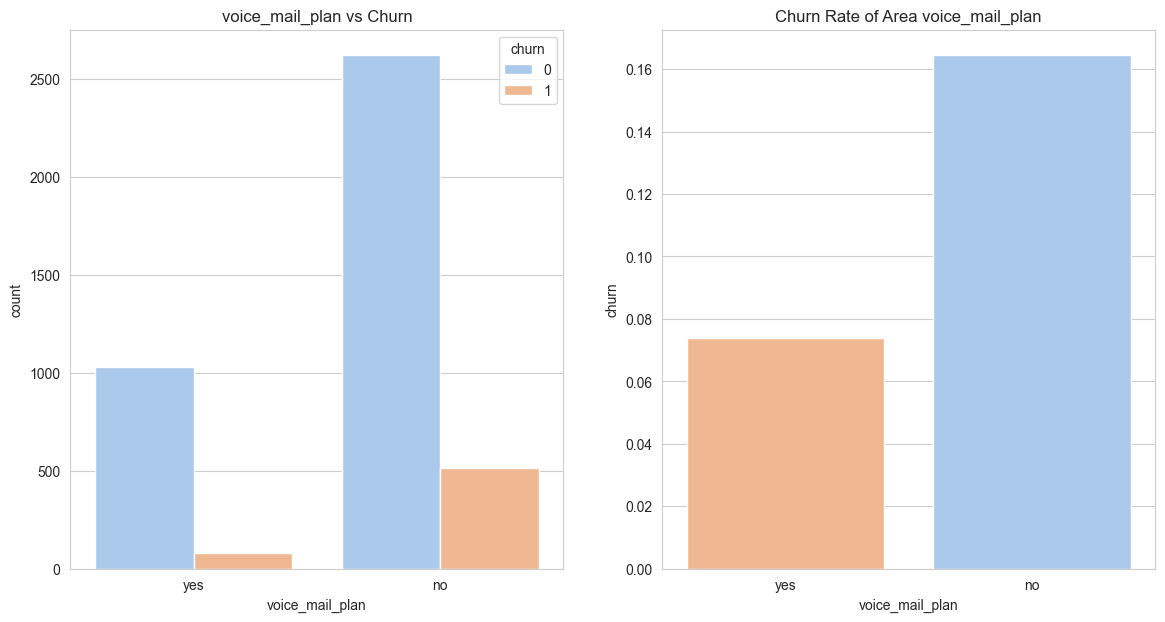

voice_mail_plan  churn
no               0        0.83556
                 1        0.16444
yes              0        0.92626
                 1        0.07374
Name: proportion, dtype: float64

In [35]:
categorical_variable(train_df, 'voice_mail_plan')

### Numerical Variables Statistical Test using T-Test

#### Levene's Test for Confirming Homogeneity of Variance

In [36]:
churn_group = train_df[train_df['churn'] == 1]
no_churn_group = train_df[train_df['churn'] == 0]

equal_var = []
no_equal_var = []

for variable in numerical:
    stat, p = stats.levene(churn_group[variable], no_churn_group[variable])
    print(f'{variable}: stat = {stat}, p-value = {p}')
    if p >= 0.05:
        equal_var.append(variable)
    elif p < 0.05:
        no_equal_var.append(variable)

account_length: stat = 0.6176873683633011, p-value = 0.4319518100608327
number_vmail_messages: stat = 43.21002028787968, p-value = 5.51138093433281e-11
total_day_minutes: stat = 208.9873358998856, p-value = 2.8196258359512035e-46
total_day_calls: stat = 3.1528484974814313, p-value = 0.07586612011236292
total_day_charge: stat = 209.01642918153692, p-value = 2.78062021364043e-46
total_eve_minutes: stat = 1.3332197566645458, p-value = 0.24829817510270327
total_eve_calls: stat = 0.07847077548324388, p-value = 0.7793942041699933
total_eve_charge: stat = 1.331082199817374, p-value = 0.24867769093305775
total_night_minutes: stat = 0.7665810028865825, p-value = 0.3813263311691236
total_night_calls: stat = 0.40165865889282465, p-value = 0.5262680188732223
total_night_charge: stat = 0.7706512396078887, p-value = 0.3800653081266483
total_intl_minutes: stat = 1.3217388956872356, p-value = 0.250344932187394
total_intl_calls: stat = 2.6795194084788996, p-value = 0.10172047194157784
total_intl_charge

#### Two Sample T-Test

In [37]:
for variable in equal_var:
    stat, p = stats.ttest_ind(churn_group[variable], no_churn_group[variable], equal_var=True)
    print(f'{variable}: stat = {stat}, p-value = {p}')
for variable in no_equal_var:
    stat, p = stats.ttest_ind(churn_group[variable], no_churn_group[variable], equal_var=False)
    print(f'{variable}: stat = {stat}, p-value = {p}')

account_length: stat = 1.2632629049067146, p-value = 0.2065640406219783
total_day_calls: stat = 0.7587355154930737, p-value = 0.4480528815925684
total_eve_minutes: stat = 5.155575615202006, p-value = 2.643535285080068e-07
total_eve_calls: stat = -0.4442986774771535, p-value = 0.6568492896605
total_eve_charge: stat = 5.155338543261689, p-value = 2.6468612771912965e-07
total_night_minutes: stat = 3.0436218354935582, p-value = 0.002351794219207612
total_night_calls: stat = -0.8277489988885307, p-value = 0.40785916127423794
total_night_charge: stat = 3.043215641770052, p-value = 0.0023549642264044796
total_intl_minutes: stat = 3.602316069258084, p-value = 0.00031900405625173657
total_intl_calls: stat = -2.239106011442357, p-value = 0.025200582343272958
total_intl_charge: stat = 3.6017153387867236, p-value = 0.0003197400009862881
number_vmail_messages: stat = -7.629191163852065, p-value = 5.884325023424041e-14
total_day_minutes: stat = 11.351061964809938, p-value = 1.5719280728299807e-27
to

### Categorical Variables Statistical Test using Chi-Square Test

#### Chi-Square Independent Test

In [38]:
for variable in categorical:
    crosstab = pd.crosstab(train_df[variable], train_df['churn'])
    chi2, p, dof,expected = stats.chi2_contingency(crosstab)
    print(f'{variable}: chi2_stat = {chi2}, p-value = {p}')

state: chi2_stat = 85.99367296303294, p-value = 0.0011690284839826974
area_code: chi2_stat = 1.2166542631365147, p-value = 0.5442605842955197
international_plan: chi2_stat = 282.65349013787664, p-value = 1.9831895448817517e-63
voice_mail_plan: chi2_stat = 55.10981373962457, p-value = 1.139803854851859e-13


### Data Preprocessing

#### Check Null Values

In [39]:
display(train_df.isnull().sum())
display(test_df.isnull().sum())

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

#### Check Duplicated Values

In [40]:
display(train_df.duplicated().sum())
display(test_df.duplicated().sum())

0

0

#### Feature Engineering

In [41]:
feature_drop = ['total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes']
train_df = train_df.drop(feature_drop, axis=1)
test_df = test_df.drop(feature_drop, axis=1)

#### Encoding Categorical Features

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
train_df['international_plan'] = LabelEncoder().fit_transform(train_df['international_plan'])
train_df['voice_mail_plan'] = LabelEncoder().fit_transform(train_df['voice_mail_plan'])
test_df['international_plan'] = LabelEncoder().fit_transform(test_df['international_plan'])
test_df['voice_mail_plan'] = LabelEncoder().fit_transform(test_df['voice_mail_plan'])

In [44]:
train_df['area_code'] = train_df['area_code'].map({'area_code_510': 1, 'area_code_408': 0, 'area_code_415': 0})
test_df['area_code'] = test_df['area_code'].map({'area_code_510': 1, 'area_code_408': 0, 'area_code_415': 0})

In [45]:
state_churn_means = train_df.groupby('state')['churn'].mean()
train_df['state_proba'] = train_df['state'].map(state_churn_means)
test_df['state_proba'] = test_df['state'].map(state_churn_means)
train_df.drop('state', axis=1, inplace=True)
test_df.drop('state', axis=1, inplace=True)

In [46]:
display(train_df.head())
display(test_df.head())

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,state_proba
0,107,0,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,0.12632
1,137,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,0.27083
2,84,0,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0,0.12632
3,75,0,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0,0.20513
4,121,1,0,1,24,88,37.09,108,29.62,118,9.57,7,2.03,3,0,0.15730


,id,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,state_proba
0,1,128,0,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0.17241
1,2,118,1,1,0,0,98,37.98,101,18.75,118,9.18,6,1.70,0,0.12871
2,3,62,0,0,0,0,70,20.52,76,26.11,99,9.14,6,3.54,4,0.11290
3,4,93,1,0,0,0,114,32.42,111,18.55,121,5.83,3,2.19,3,0.11628
4,5,174,0,0,0,0,76,21.13,112,23.55,115,11.28,5,4.19,3,0.06849


#### Feature Scalling

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
feature_to_scale = ['account_length','number_vmail_messages','total_day_calls','total_day_charge',
                   'total_eve_calls','total_eve_charge','total_night_calls','total_night_charge','total_intl_calls','total_intl_charge',
                   'number_customer_service_calls','state_proba']

scaler = StandardScaler()
train_df[feature_to_scale] = scaler.fit_transform(train_df[feature_to_scale])
test_df[feature_to_scale] = scaler.fit_transform(test_df[feature_to_scale])

In [49]:
display(train_df.head())
display(test_df.head())

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,state_proba
0,0.17040,0,0,1,1.36686,1.16345,-0.34579,0.14184,-0.09249,0.15731,1.07082,-0.57916,1.24859,-0.42635,0,-0.29094
1,0.92619,0,0,0,-0.56791,0.71001,1.16930,0.49349,-1.57234,0.20708,-0.75205,0.23293,0.69834,-1.18896,0,2.63089
2,-0.40904,0,1,0,-0.56791,-1.45640,2.20622,-0.61169,-2.75247,-0.53953,-0.07234,1.04502,-1.32819,0.33627,0,-0.29094
3,-0.63577,0,1,0,-0.56791,0.65963,-0.25103,1.09632,-1.03145,1.05324,-0.27096,-0.57916,-0.05322,1.09888,0,1.30248
4,0.52310,1,0,1,1.21803,-0.59991,0.70203,0.39302,2.95150,0.90392,0.24104,1.04502,-0.99267,1.09888,0,0.33556


,id,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,state_proba
0,1,0.69606,0,0,1,1.17224,0.47087,1.59069,-0.06579,-0.11214,-0.48876,0.87477,-0.61370,-0.10698,-0.49764,0.59689
1,2,0.44400,1,1,0,-0.59901,-0.13810,0.80706,0.03754,0.33229,0.91951,0.08508,0.62582,-1.44530,-1.28173,-0.27739
2,3,-0.96755,0,0,0,-0.59901,-1.55903,-1.12271,-1.25414,1.99268,-0.07149,0.06782,0.62582,1.01721,1.85465,-0.59367
3,4,-0.18616,1,0,0,-0.59901,0.67386,0.19254,0.55422,0.28717,1.07599,-1.36052,-0.61370,-0.78952,1.07055,-0.52613
4,5,1.85556,0,0,0,-0.59901,-1.25455,-1.05528,0.60588,1.41515,0.76304,0.99128,0.21265,1.88712,1.07055,-1.48213


#### Split Training and Validation Data

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = train_df.drop('churn', axis=1)
y = train_df['churn']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=200)
print(f"Training set size: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Validation set size: X_val: {X_val.shape}, y_val: {y_val.shape}")

Training set size: X_train: (3400, 15), y_train: (3400,)
Validation set size: X_val: (850, 15), y_val: (850,)


In [52]:
X.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,state_proba
0,0.17040,0,0,1,1.36686,1.16345,-0.34579,0.14184,-0.09249,0.15731,1.07082,-0.57916,1.24859,-0.42635,-0.29094
1,0.92619,0,0,0,-0.56791,0.71001,1.16930,0.49349,-1.57234,0.20708,-0.75205,0.23293,0.69834,-1.18896,2.63089
2,-0.40904,0,1,0,-0.56791,-1.45640,2.20622,-0.61169,-2.75247,-0.53953,-0.07234,1.04502,-1.32819,0.33627,-0.29094
3,-0.63577,0,1,0,-0.56791,0.65963,-0.25103,1.09632,-1.03145,1.05324,-0.27096,-0.57916,-0.05322,1.09888,1.30248
4,0.52310,1,0,1,1.21803,-0.59991,0.70203,0.39302,2.95150,0.90392,0.24104,1.04502,-0.99267,1.09888,0.33556


#### Addressing Class Imbalance

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
y_train.value_counts()

churn
0    2915
1     485
Name: count, dtype: int64

In [55]:
over_sampling = SMOTE(sampling_strategy='auto', random_state=200)
X_train, y_train = over_sampling.fit_resample(X_train, y_train)

In [56]:
y_train.value_counts()

churn
1    2915
0    2915
Name: count, dtype: int64

### Building Machine Learning Models

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, accuracy_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

scoring_metrics = {'recall': make_scorer(recall_score),'accuracy': make_scorer(accuracy_score),'precision': make_scorer(precision_score),'f1_score': make_scorer(f1_score),'auc': 'roc_auc'}

#### Logistic Regression

In [58]:
lr = LogisticRegression(random_state=200)
param_lr = {'max_iter': [100],'penalty': ['l1', 'l2'],'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],'solver': ['liblinear']}
classifier_lr = GridSearchCV(estimator=lr,param_grid=param_lr,scoring='recall',cv=10,verbose=False,n_jobs=-1,refit=True)
classifier_lr.fit(X_train, y_train)
best_classifier_lr = classifier_lr.best_estimator_
y_pred_lr = best_classifier_lr.predict(X_train)

#### Decision Tree

In [59]:
dt = DecisionTreeClassifier(random_state=200)
param_dt = {'criterion': ['gini', 'entropy'],'max_depth': [None, 5, 10, 15],'min_samples_split': [2, 5, 10, 20],'min_samples_leaf': [1, 2, 5, 10],'ccp_alpha': [0.0, 0.01, 0.02]}
classifier_dt = GridSearchCV(estimator=dt,param_grid=param_dt,scoring='recall',cv=10,verbose=False,n_jobs=-1,refit=True)
classifier_dt.fit(X_train, y_train)
best_classifier_dt = classifier_dt.best_estimator_
y_pred_dt = best_classifier_dt.predict(X_train)

#### Random Forest

In [60]:
rf = RandomForestClassifier(random_state=200)
param_rf = {'n_estimators': [100],'criterion': ['entropy', 'gini'],'bootstrap': [True, False],'max_depth': [6],'max_features': ['log2', 'sqrt'],'min_samples_leaf': [2, 3, 5],'min_samples_split': [2, 3, 5]}
classifier_rf = GridSearchCV(estimator=rf,param_grid=param_rf,scoring='recall',cv=10,verbose=False,n_jobs=-1)
classifier_rf.fit(X_train, y_train)
best_classifier_rf = classifier_rf.best_estimator_
y_pred_rf = best_classifier_rf.predict(X_train)

#### Gradient Boosting Classifier

In [61]:
gbc = GradientBoostingClassifier(random_state=200)
param_gbc = {'n_estimators': [600],'subsample': [0.66, 0.75],'learning_rate': [0.001, 0.01],'max_depth': [3],'min_samples_split': [5, 7],'min_samples_leaf': [3, 5],'max_features': ['sqrt', 'log2'],'n_iter_no_change': [20],'validation_fraction': [0.2],'tol': [0.01]}
classifier_gbc = GridSearchCV(estimator=gbc,param_grid=param_gbc,scoring='recall',cv=10,verbose=True,n_jobs=-1,refit=True)
classifier_gbc.fit(X_train, y_train)
best_classifier_gbc = classifier_gbc.best_estimator_
y_pred_gbc = best_classifier_gbc.predict(X_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


#### Support Vector Classifier

In [62]:
svc = SVC(random_state=200)
param_svc = [{'kernel': ['rbf'], 'gamma': ['scale', 'auto'], 'C': [0.1, 1, 2]}, {'kernel': ['linear'], 'C': [0.1, 1, 10]}]
classifier_svc = GridSearchCV(estimator=svc, param_grid=param_svc, scoring='recall', cv=10, verbose=True, n_jobs=-1)
classifier_svc.fit(X_train, y_train)
best_classifier_svc = classifier_svc.best_estimator_
y_pred_svc = best_classifier_svc.predict(X_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


#### Performance Comparison

,Accuracy,Precision,Recall,F1 Score
LG,0.728130,0.686066,0.841166,0.755740
DT,1.000000,1.000000,1.000000,1.000000
RF,0.886106,0.933719,0.831218,0.879492
GBC,0.863465,0.902393,0.815094,0.856525
SVC,0.951115,0.961404,0.939966,0.950564


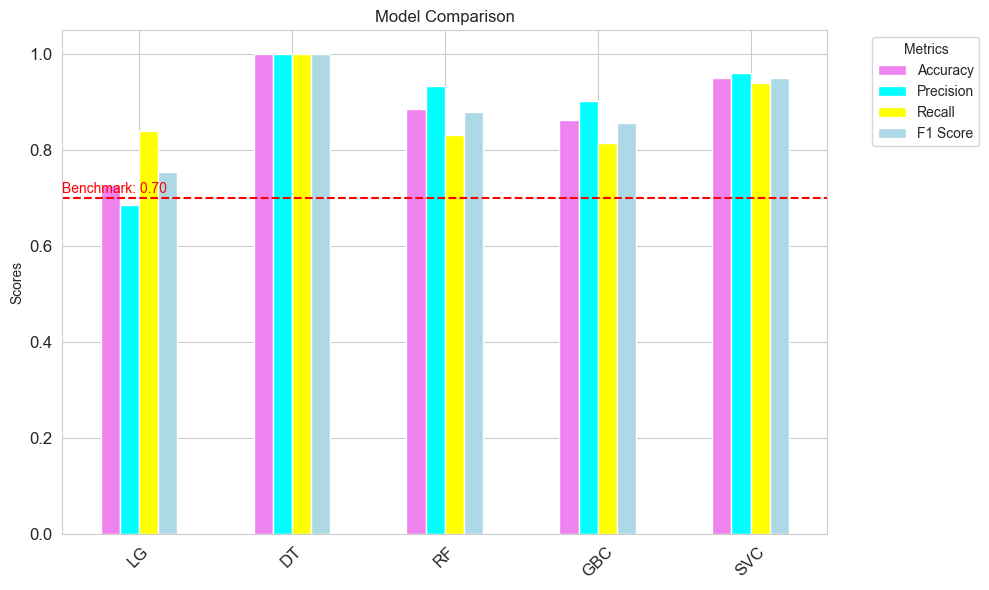

In [63]:
comparison_dict = {
    'LG': [
        accuracy_score(y_train, y_pred_lr),
        precision_score(y_train, y_pred_lr),
        recall_score(y_train, y_pred_lr),
        f1_score(y_train, y_pred_lr)
    ],
    'DT': [
        accuracy_score(y_train, y_pred_dt),
        precision_score(y_train, y_pred_dt),
        recall_score(y_train, y_pred_dt),
        f1_score(y_train, y_pred_dt)
    ],
    'RF': [
        accuracy_score(y_train, y_pred_rf),
        precision_score(y_train, y_pred_rf),
        recall_score(y_train, y_pred_rf),
        f1_score(y_train, y_pred_rf)
    ],
    'GBC': [
        accuracy_score(y_train, y_pred_gbc),
        precision_score(y_train, y_pred_gbc),
        recall_score(y_train, y_pred_gbc),
        f1_score(y_train, y_pred_gbc)
    ],
    'SVC': [
        accuracy_score(y_train, y_pred_svc),
        precision_score(y_train, y_pred_svc),
        recall_score(y_train, y_pred_svc),
        f1_score(y_train, y_pred_svc)
    ]
}

comparison_df = pd.DataFrame(comparison_dict, index = ['Accuracy', 'Precision', 'Recall', 'F1 Score']).T
performance_df = comparison_df.style.highlight_max(color='violet', axis=0)
comparison_df.plot(kind='bar', figsize=(10, 6), fontsize=12,color=['violet', 'cyan', 'yellow', 'lightblue'])

plt.title('Model Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axhline(y=0.70, color='red', linestyle='--')
plt.text(x=-0.5, y=0.71, s='Benchmark: 0.70', color='red')

display(performance_df)
plt.tight_layout()
plt.show()

#### Confusion Matrix and Learning Curve

In [64]:
def cm_and_lc(classifier, y_pred):
    fig, ax = plt.subplots(1,2,figsize=(14,5))

    cm = confusion_matrix(y_train, y_pred, normalize='true')
    sns.heatmap(cm,annot=True,cmap='Blues',fmt='.2f',ax=ax[0])
    ax[0].set_title('Confusion Matrix')
    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_xticklabels(['No Churn', 'Churn'])
    ax[0].set_yticklabels(['No Churn', 'Churn'])

    train_sizes, train_scores, test_scores = learning_curve(classifier, X_train, y_train, cv=10, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5), scoring='recall')
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    ax[1].plot(train_sizes, train_mean, label='Training score', color='red', marker='o')
    ax[1].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='red', alpha=0.15)
    ax[1].plot(train_sizes, test_mean, label='Cross-validation score', color='blue', marker='o')
    ax[1].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='blue', alpha=0.15)
    ax[1].set_title('Learning Curve')
    ax[1].set_xlabel('Training Examples')
    ax[1].set_ylabel('Recall Score')
    ax[1].legend(loc='best')

    plt.tight_layout()
    plt.show()

#### Logistic Regression

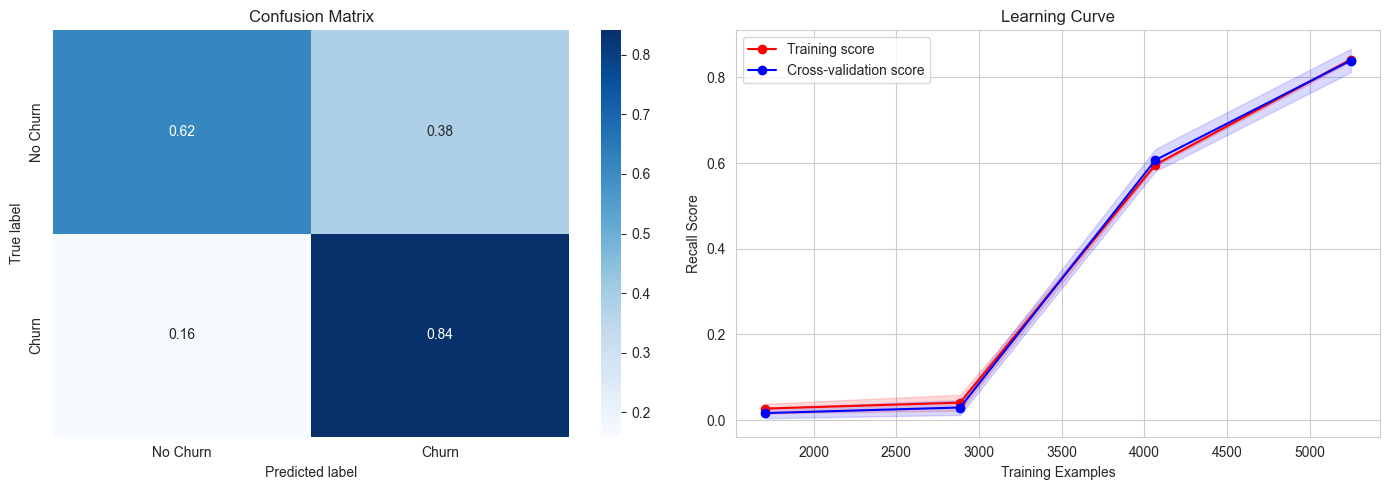

In [65]:
cm_and_lc(best_classifier_lr, y_pred_lr)

#### Decision Tree

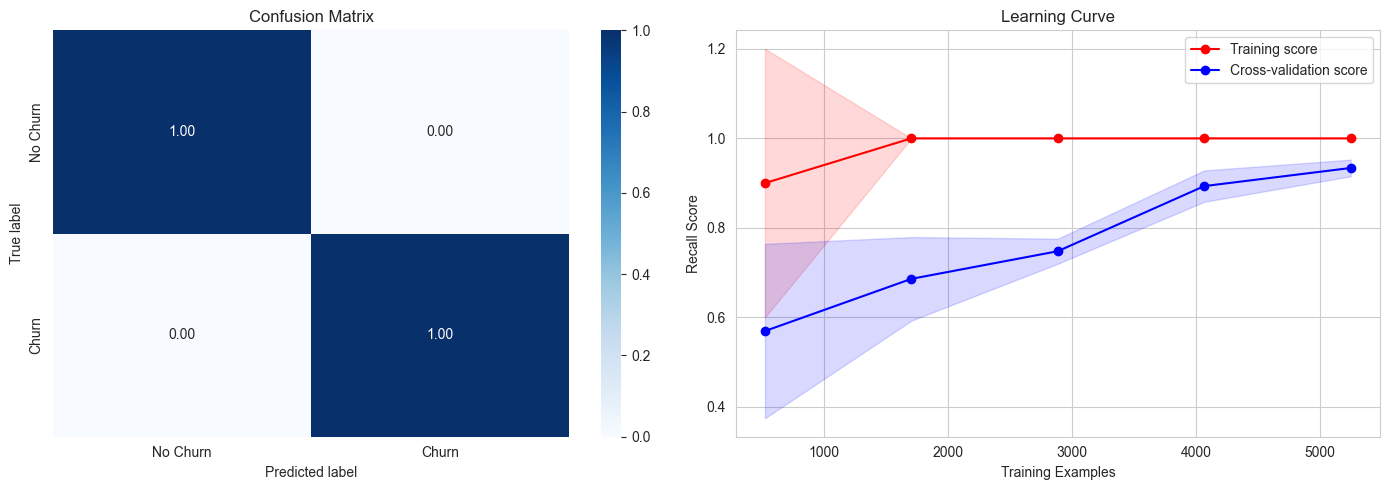

In [66]:
cm_and_lc(best_classifier_dt, y_pred_dt)

#### Random Forest

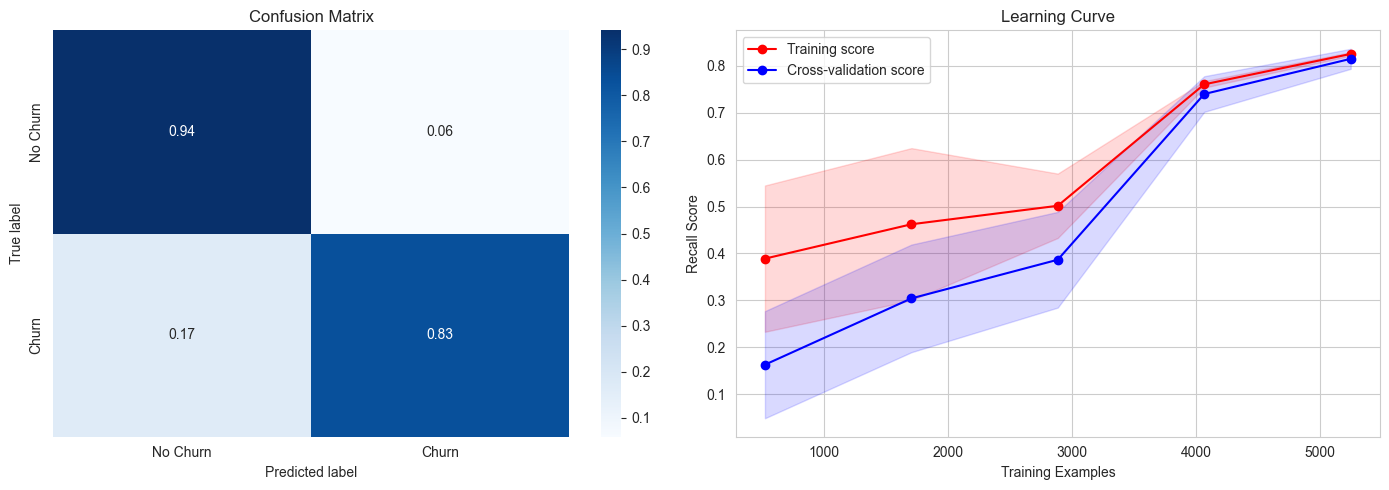

In [67]:
cm_and_lc(best_classifier_rf, y_pred_rf)

#### Gradient Boosting Classifier

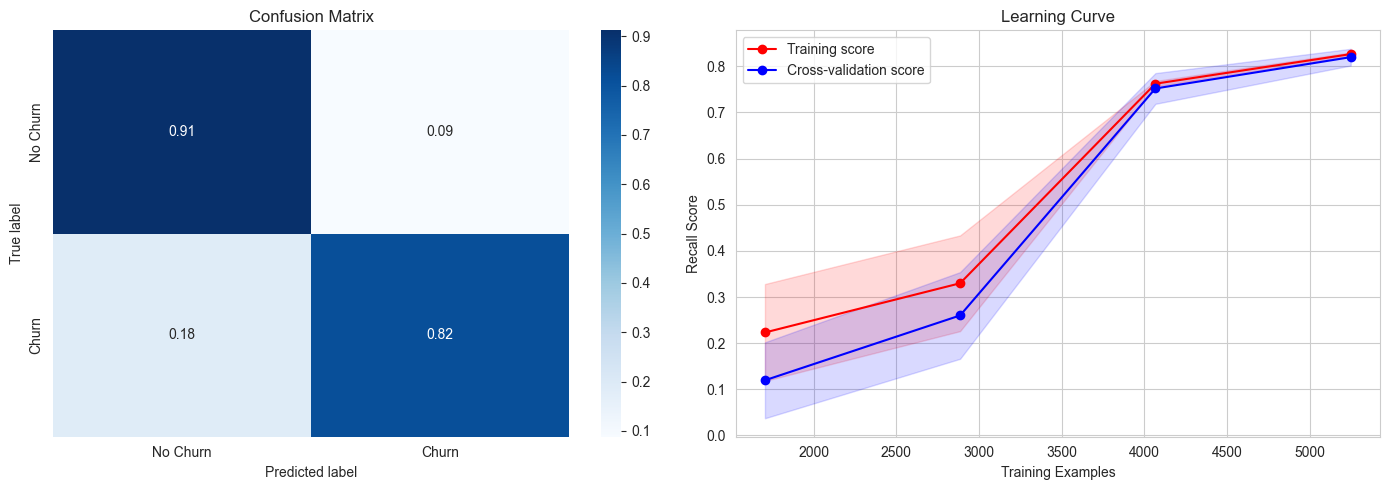

In [68]:
cm_and_lc(best_classifier_gbc, y_pred_gbc)

#### Support Vector Classifier

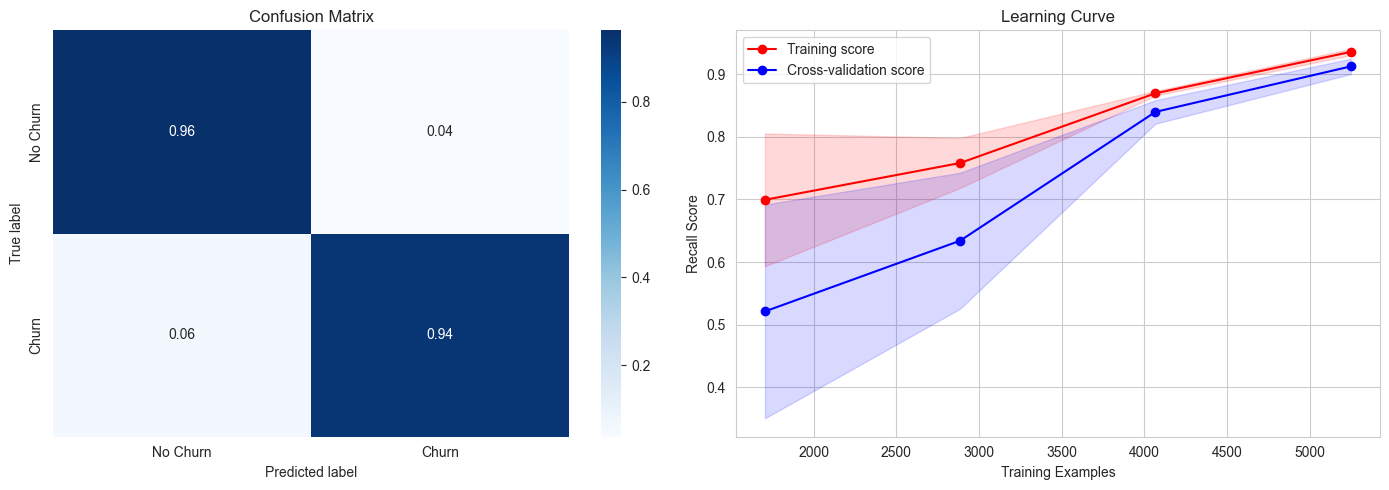

In [69]:
cm_and_lc(best_classifier_svc, y_pred_svc)

### Performing Model in Validation Set

In [70]:
y_pred_lr_val = best_classifier_lr.predict(X_val)
y_pred_dt_val = best_classifier_dt.predict(X_val)
y_pred_rf_val = best_classifier_rf.predict(X_val)
y_pred_gbc_val = best_classifier_gbc.predict(X_val)
y_pred_svc_val = best_classifier_svc.predict(X_val)

,Accuracy,Precision,Recall,F1 Score
LG,0.635294,0.246787,0.849558,0.382470
DT,0.907059,0.611842,0.823009,0.701887
RF,0.912941,0.640288,0.787611,0.706349
GBC,0.897647,0.583333,0.805310,0.676580
SVC,0.900000,0.616667,0.654867,0.635193


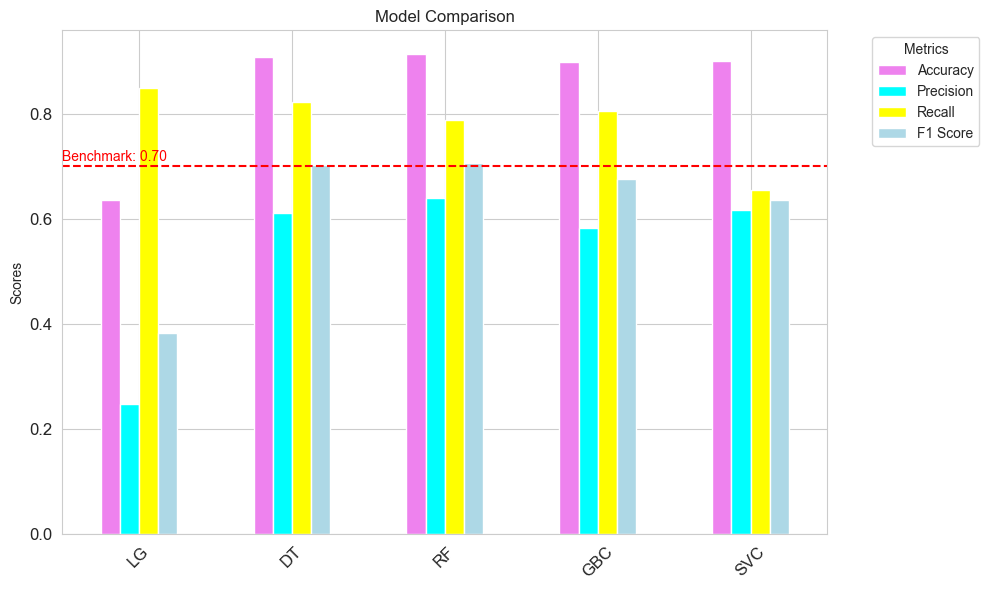

In [71]:
comparison_dict_val = {
    'LG': [
        accuracy_score(y_val, y_pred_lr_val),
        precision_score(y_val, y_pred_lr_val),
        recall_score(y_val, y_pred_lr_val),
        f1_score(y_val, y_pred_lr_val)
    ],
    'DT': [
        accuracy_score(y_val, y_pred_dt_val),
        precision_score(y_val, y_pred_dt_val),
        recall_score(y_val, y_pred_dt_val),
        f1_score(y_val, y_pred_dt_val)
    ],
    'RF': [
        accuracy_score(y_val, y_pred_rf_val),
        precision_score(y_val, y_pred_rf_val),
        recall_score(y_val, y_pred_rf_val),
        f1_score(y_val, y_pred_rf_val)
    ],
    'GBC': [
        accuracy_score(y_val, y_pred_gbc_val),
        precision_score(y_val, y_pred_gbc_val),
        recall_score(y_val, y_pred_gbc_val),
        f1_score(y_val, y_pred_gbc_val)
    ],
    'SVC': [
        accuracy_score(y_val, y_pred_svc_val),
        precision_score(y_val, y_pred_svc_val),
        recall_score(y_val, y_pred_svc_val),
        f1_score(y_val, y_pred_svc_val)
    ]
}

comparison_df_val = pd.DataFrame(comparison_dict_val, index = ['Accuracy', 'Precision', 'Recall', 'F1 Score']).T
performance_df_val = comparison_df_val.style.highlight_max(color='violet', axis=0)
comparison_df_val.plot(kind='bar', figsize=(10, 6), fontsize=12,color=['violet', 'cyan', 'yellow', 'lightblue'])

plt.title('Model Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axhline(y=0.70, color='red', linestyle='--')
plt.text(x=-0.5, y=0.71, s='Benchmark: 0.70', color='red')

display(performance_df_val)
plt.tight_layout()
plt.show()

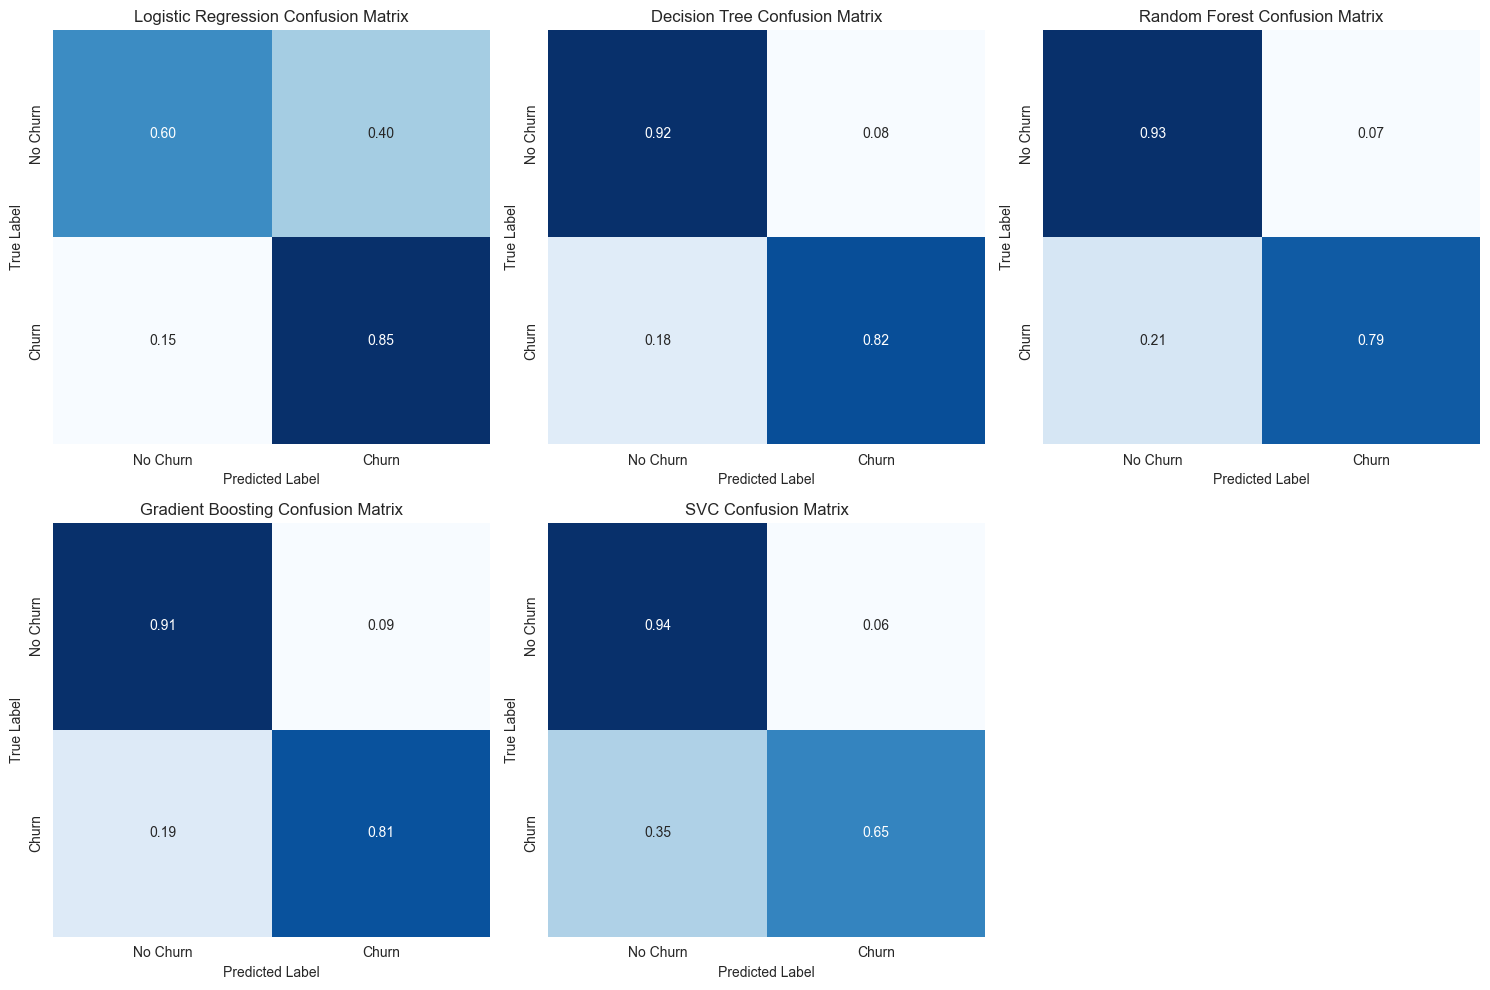

In [72]:
def plot_confusion_matrix(cm, model_name, ax):
    sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_xticklabels(['No Churn', 'Churn'])
    ax.set_yticklabels(['No Churn', 'Churn'], va='center')

cm_lr = confusion_matrix(y_val, y_pred_lr_val, normalize='true')
cm_dt = confusion_matrix(y_val, y_pred_dt_val, normalize='true')
cm_rf = confusion_matrix(y_val, y_pred_rf_val, normalize='true')
cm_gbc = confusion_matrix(y_val, y_pred_gbc_val, normalize='true')
cm_svc = confusion_matrix(y_val, y_pred_svc_val, normalize='true')

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

plot_confusion_matrix(cm_lr, 'Logistic Regression', axs[0])
plot_confusion_matrix(cm_dt, 'Decision Tree', axs[1])
plot_confusion_matrix(cm_rf, 'Random Forest', axs[2])
plot_confusion_matrix(cm_gbc, 'Gradient Boosting', axs[3])
plot_confusion_matrix(cm_svc, 'SVC', axs[4])

axs[5].axis('off')

plt.tight_layout()
plt.show()

### Performing Model in Test Set (Random Forest)

In [73]:
feature_columns = [col for col in test_df.columns if col != 'id']
features_for_prediction = test_df[feature_columns]

y_pred_rf_test = best_classifier_rf.predict(features_for_prediction)

test_df['churn'] = y_pred_rf_test

In [74]:
test_df.head()

,id,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,state_proba,churn
0,1,0.69606,0,0,1,1.17224,0.47087,1.59069,-0.06579,-0.11214,-0.48876,0.87477,-0.61370,-0.10698,-0.49764,0.59689,0
1,2,0.44400,1,1,0,-0.59901,-0.13810,0.80706,0.03754,0.33229,0.91951,0.08508,0.62582,-1.44530,-1.28173,-0.27739,0
2,3,-0.96755,0,0,0,-0.59901,-1.55903,-1.12271,-1.25414,1.99268,-0.07149,0.06782,0.62582,1.01721,1.85465,-0.59367,1
3,4,-0.18616,1,0,0,-0.59901,0.67386,0.19254,0.55422,0.28717,1.07599,-1.36052,-0.61370,-0.78952,1.07055,-0.52613,0
4,5,1.85556,0,0,0,-0.59901,-1.25455,-1.05528,0.60588,1.41515,0.76304,0.99128,0.21265,1.88712,1.07055,-1.48213,0


### Model Interpretation

In [75]:
import shap

In [76]:
df_test = test_df.drop(columns=['id', 'churn'])

In [77]:
%%time

rf_explainer = shap.TreeExplainer(best_classifier_rf, X_train)
shap_values = rf_explainer.shap_values(df_test)
shap_values.shape

CPU times: total: 6.23 s
Wall time: 6.4 s


(750, 15, 2)

In [78]:
shap_val_positive = shap_values[..., 1]
shap_val_negative = shap_values[..., 0]

In [79]:
pd.DataFrame(shap_val_positive, columns=df_test.columns).head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,state_proba
0,0.00667,0.01142,-0.02069,-0.19709,-0.09080,0.00043,0.09355,0.00129,0.00016,-0.00091,0.00054,0.03595,-0.01053,-0.00681,0.01436
1,0.00460,-0.07197,0.09147,0.02515,-0.00289,0.00210,-0.02161,0.00254,0.00959,0.00285,0.00145,-0.03134,-0.04988,-0.04582,-0.01292
2,0.00115,0.01198,-0.02019,0.02420,0.00311,-0.00827,-0.02663,0.00249,0.00100,0.00157,0.00330,-0.01790,0.00513,0.25752,-0.03822
3,-0.00148,-0.07088,-0.03434,0.02764,-0.00565,0.00329,-0.06989,0.00143,0.01138,-0.00018,-0.02908,0.05962,-0.00736,-0.02912,-0.00893
4,0.00214,0.01320,-0.02615,0.02449,-0.00491,-0.00482,-0.08124,0.00180,0.02784,0.00135,0.01224,-0.00524,0.01202,-0.02021,-0.12582


In [80]:
pd.DataFrame(shap_val_negative, columns=df_test.columns).head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,state_proba
0,-0.00667,-0.01142,0.02069,0.19709,0.09080,-0.00043,-0.09355,-0.00129,-0.00016,0.00091,-0.00054,-0.03595,0.01053,0.00681,-0.01436
1,-0.00460,0.07197,-0.09147,-0.02515,0.00289,-0.00210,0.02161,-0.00254,-0.00959,-0.00285,-0.00145,0.03134,0.04988,0.04582,0.01292
2,-0.00115,-0.01198,0.02019,-0.02420,-0.00311,0.00827,0.02663,-0.00249,-0.00100,-0.00157,-0.00330,0.01790,-0.00513,-0.25752,0.03822
3,0.00148,0.07088,0.03434,-0.02764,0.00565,-0.00329,0.06989,-0.00143,-0.01138,0.00018,0.02908,-0.05962,0.00736,0.02912,0.00893
4,-0.00214,-0.01320,0.02615,-0.02449,0.00491,0.00482,0.08124,-0.00180,-0.02784,-0.00135,-0.01224,0.00524,-0.01202,0.02021,0.12582


#### Global Feature Importances

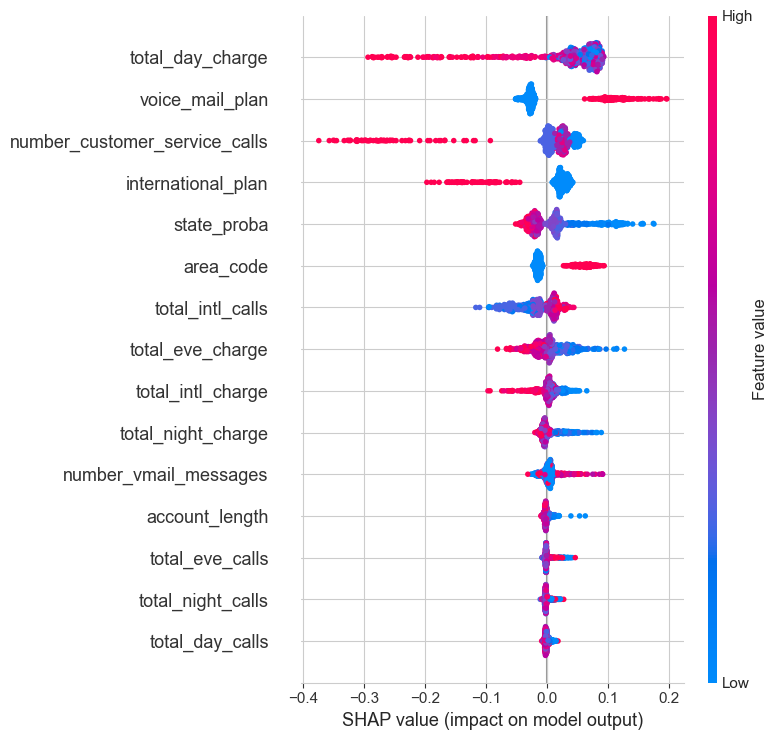

In [81]:
shap.summary_plot(shap_val_negative, df_test)

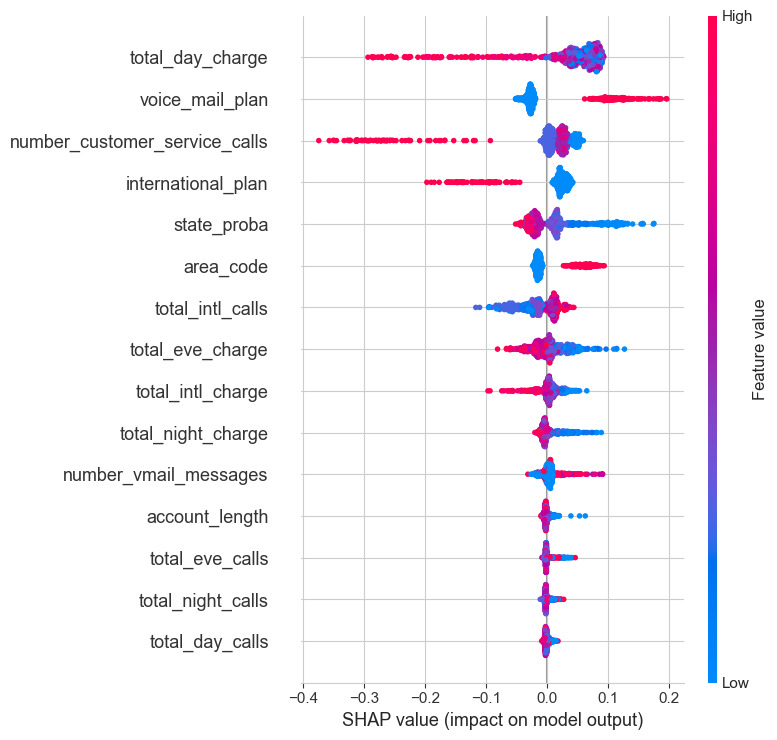

In [82]:
shap.summary_plot(shap_val_negative, df_test)

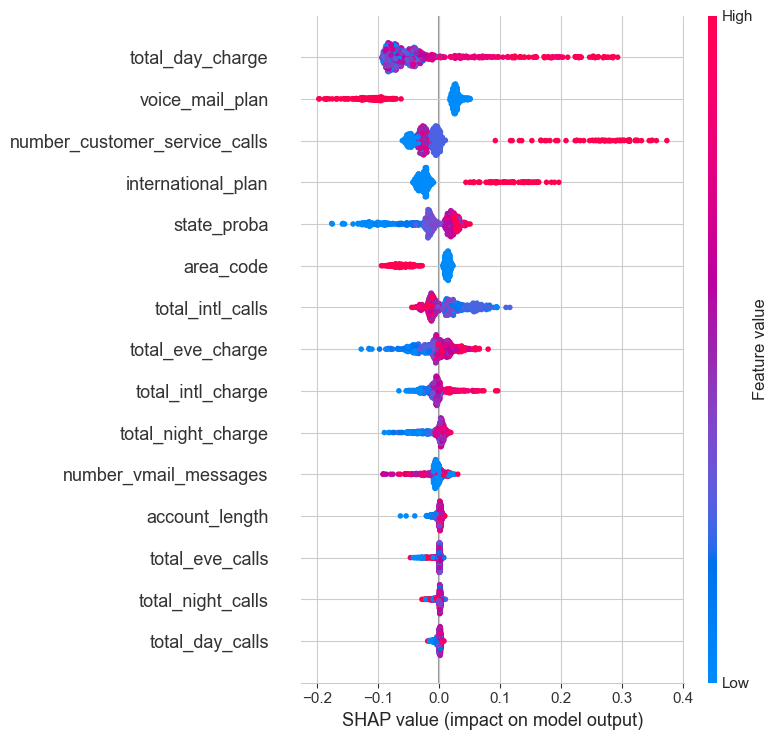

In [83]:
shap.summary_plot(shap_val_positive, df_test)